In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.linear_model import LogisticRegression

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score


from PIL import Image  #Python Image Library
#from pillow import Image
import h5py
import scipy
from scipy import ndimage

import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
df = pd.read_csv('MyDataFilmsScaled.csv')

In [4]:
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count,credits,language
0,15660,Mommie Dearest,Drama,en,Renowned actress Joan Crawford at the height o...,10.589,Paramount-The Irwin Yablans Company,1981-09-18,19.032261,5.0,128.0,Released,6.400,166.0,Faye Dunaway-Diana Scarwid-Steve Forrest-Howar...,1
1,230266,Miss Julie,Drama,en,Over the course of a midsummer night in Ferman...,8.633,Maipo Film-The Apocalypse Films,2014-09-07,5.500000,5.0,130.0,Released,5.700,123.0,Jessica Chastain-Colin Farrell-Samantha Morton...,1
2,9322,La Femme Nikita,Action-Thriller,fr,A beautiful felon sentenced to life in prison ...,19.647,Gaumont-Cecchi Gori Group Tiger Cinematografic...,1990-02-21,8.538703,5.0,117.0,Released,7.100,1636.0,Anne Parillaud-Jean-Hugues Anglade-Tchéky Kary...,0
3,592336,Don't Stop Me Now,Comedy,it,Paola a modern woman used to the hardships of ...,8.115,Wildside-Vision Distribution,2019-04-18,8.000000,5.0,102.0,Released,6.346,331.0,Paola Cortellesi-Stefano Fresi-Vinicio Marchio...,0
4,8747,The Black Balloon,Drama,en,Thomas is turning 16. His dad's in the army an...,7.272,Black Balloon Productions,2008-03-08,5.000000,5.0,97.0,Released,6.800,65.0,Toni Collette-Rhys Wakefield-Luke Ford-Gemma W...,1


In [5]:
import sklearn
sklearn.__version__

'0.24.2'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117 entries, 0 to 5116
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5117 non-null   int64  
 1   title                 5117 non-null   object 
 2   genres                5117 non-null   object 
 3   original_language     5117 non-null   object 
 4   overview              5116 non-null   object 
 5   popularity            5117 non-null   float64
 6   production_companies  5117 non-null   object 
 7   release_date          5117 non-null   object 
 8   budget                5117 non-null   float64
 9   revenue               5117 non-null   float64
 10  runtime               5117 non-null   float64
 11  status                5117 non-null   object 
 12  vote_average          5117 non-null   float64
 13  vote_count            5117 non-null   float64
 14  credits               5117 non-null   object 
 15  language             

In [16]:
df.head()
df = df.sort_values('budget')

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count,credits,language,is_profitable
0,15660,Mommie Dearest,Drama,en,Renowned actress Joan Crawford at the height o...,10.589,Paramount-The Irwin Yablans Company,1981-09-18,19.032261,5.0,128.0,Released,6.400,166.0,Faye Dunaway-Diana Scarwid-Steve Forrest-Howar...,1,0
1,230266,Miss Julie,Drama,en,Over the course of a midsummer night in Ferman...,8.633,Maipo Film-The Apocalypse Films,2014-09-07,5.500000,5.0,130.0,Released,5.700,123.0,Jessica Chastain-Colin Farrell-Samantha Morton...,1,0
2,9322,La Femme Nikita,Action-Thriller,fr,A beautiful felon sentenced to life in prison ...,19.647,Gaumont-Cecchi Gori Group Tiger Cinematografic...,1990-02-21,8.538703,5.0,117.0,Released,7.100,1636.0,Anne Parillaud-Jean-Hugues Anglade-Tchéky Kary...,0,0
3,592336,Don't Stop Me Now,Comedy,it,Paola a modern woman used to the hardships of ...,8.115,Wildside-Vision Distribution,2019-04-18,8.000000,5.0,102.0,Released,6.346,331.0,Paola Cortellesi-Stefano Fresi-Vinicio Marchio...,0,0
4,8747,The Black Balloon,Drama,en,Thomas is turning 16. His dad's in the army an...,7.272,Black Balloon Productions,2008-03-08,5.000000,5.0,97.0,Released,6.800,65.0,Toni Collette-Rhys Wakefield-Luke Ford-Gemma W...,1,0


In [22]:
def is_profitable(row):
    if row['revenue'] > row['budget']*1.3:
        return 1
    else:
        return 0

In [23]:
df['is_profitable'] = df.apply(is_profitable, axis=1)

In [24]:
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count,credits,language,is_profitable
676,144789,I'm So Excited!,Comedy,es,Something has gone wrong with the landing gear...,15.841,El Deseo,2013-03-08,5.0,11.724119,90.0,Released,5.800,604.0,Antonio Banderas-Penélope Cruz-Coté Soler-Anto...,0,1
2420,157547,Oculus,Horror,en,A woman tries to exonerate her brother's murde...,16.874,Intrepid Pictures-Blumhouse Productions-WWE St...,2013-09-08,5.0,44.459951,104.0,Released,6.400,2604.0,Karen Gillan-Brenton Thwaites-Katee Sackhoff-R...,1,1
208,26263,Death Wish 4: The Crackdown,Action-Crime-Drama,en,After the death of his girlfriend's daughter f...,16.499,Cannon Group-Golan-Globus Productions,1987-06-11,5.0,6.880310,99.0,Released,5.700,229.0,Charles Bronson-Kay Lenz-John P. Ryan-Perry Lo...,1,1
1662,1955,The Elephant Man,Drama-History,en,A Victorian surgeon rescues a heavily disfigur...,16.962,Paramount-Brooksfilms,1980-10-09,5.0,26.010864,124.0,Released,8.100,2932.0,Anthony Hopkins-John Hurt-Anne Bancroft-John G...,1,1
769,171424,The Green Inferno,Horror-Thriller-Adventure,en,A group of student activists travel from New Y...,21.348,Worldview Entertainment-Dragonfly Entertainmen...,2013-09-08,5.0,12.666449,100.0,Released,5.655,1174.0,Lorenza Izzo-Ariel Levy-Sky Ferreira-Ramón Lla...,1,1


In [25]:
df['is_profitable'].value_counts()

1    3491
0    1626
Name: is_profitable, dtype: int64

In [26]:
X = df[['budget', 'revenue']]
y = df['is_profitable']

In [27]:
X.head()
y.head()

,budget,revenue
676,5.0,11.724119
2420,5.0,44.459951
208,5.0,6.880310
1662,5.0,26.010864
769,5.0,12.666449


676     1
2420    1
208     1
1662    1
769     1
Name: is_profitable, dtype: int64

## data visualization

In [31]:
mask = y==1

Text(0.5, 0, 'Budget')

Text(0, 0.5, 'Revenue')

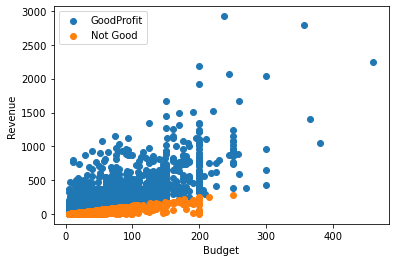

In [32]:
adm = plt.scatter(X[mask]['budget'].values, X[mask]['revenue'].values)
not_adm = plt.scatter(X[~mask]['budget'].values, X[~mask]['revenue'].values)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend((adm, not_adm), ('GoodProfit', 'Not Good'))
plt.show()

### model

In [33]:
model = LogisticRegression(penalty = 'none')
model

LogisticRegression(penalty='none')

In [34]:
model.fit(X,y)

LogisticRegression(penalty='none')

In [35]:
model.intercept_
model.coef_

array([-117.0180899])

array([[-4986.92033342,  3840.12696864]])

In [ ]:
#p(admitted = 1) = 1/(1 + exp(-(-117.0180899 + -4986.92033342 * budget + 3840.12696864 * revenue)))

In [36]:
y_pred = model.predict(X)

In [37]:
accuracy_score(y, y_pred)

1.0

In [38]:
confusion_matrix(y, y_pred)

array([[1626,    0],
       [   0, 3491]], dtype=int64)